## Exercise 1

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Visualize using PCA (2 components)
# Reduce the data with PCA
pca = PCA(n_components=2)

# You need to populate the following variable
X_mnist_reduced = pca.fit_transform(X)

In [4]:
X_mnist_reduced = pca.fit_transform(X_mnist_train)

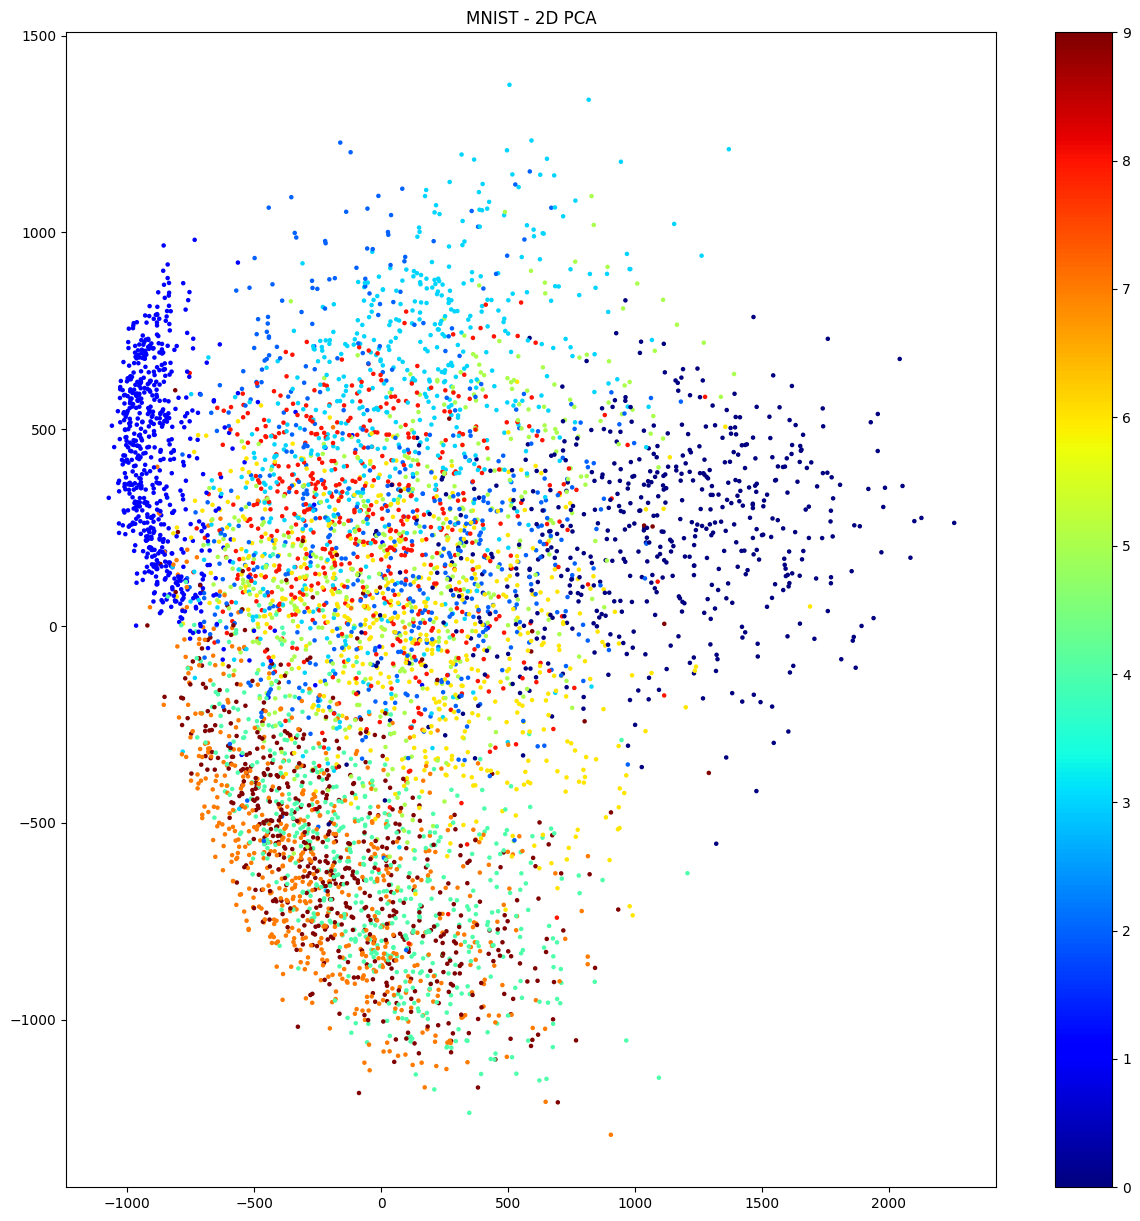

In [5]:
# Now plotting
plt.figure(figsize=(15,15))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=y_mnist_train, cmap="jet",s=5)
plt.colorbar()
plt.title("MNIST - 2D PCA")
plt.show()

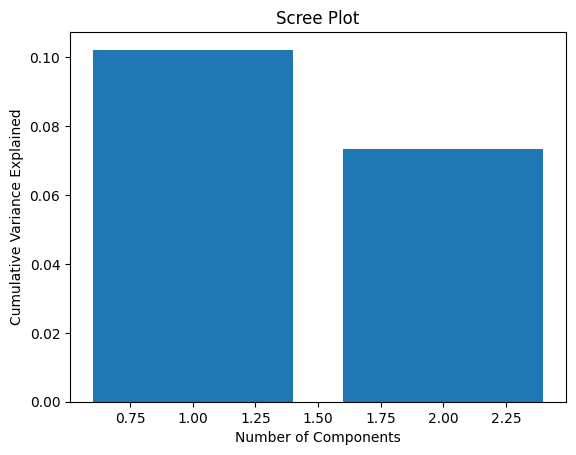

In [6]:
# Step 3: Scree Plot
pca_scree = None # What goes here???
# How do you get variance explained?
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Scree Plot")
plt.show()

In [7]:
# Step 4: Number of components for 95% variance
threshold = 0.95
pca=PCA(n_components=0.95)
X_mnist_reduced = pca.fit_transform(X_mnist_train)
n_components = len(pca.explained_variance_ratio_)+1 # What goes here???
print(f"Number of components for {threshold*100}% variance: {n_components}")

Number of components for 95.0% variance: 149


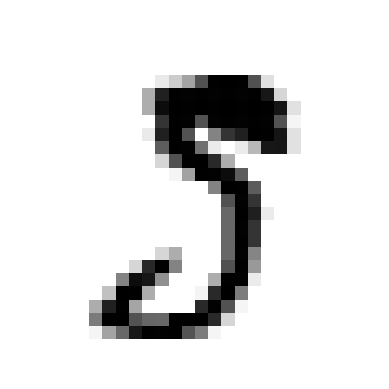

In [8]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

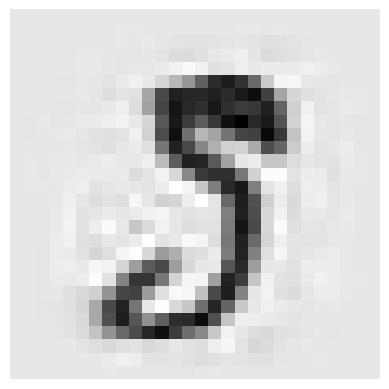

In [10]:
# Use PCA with n_components to transform the above digit.  How does it look?
X_mnist_back=pca.inverse_transform(X_mnist_reduced)
plot_mnist_digit(X_mnist_back[0])

In [11]:
# Step 5: k-NN Classification
# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

# With PCA
# You have some work to do right here

X_mnist_test_reduced=pca.transform(X_mnist_test)
knn.fit(X_mnist_reduced, y_mnist_train)
y_pred_pca = knn.predict(X_mnist_test_reduced) # How do you do this?
print(f"PCA-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")

Original Data Accuracy: 0.9421428571428572
PCA-transformed Data Accuracy: 0.9471428571428572


## Exercise 2

1. Try using t-SNE to visualize the MNIST data above.  How does it compare to PCA?
2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE result')

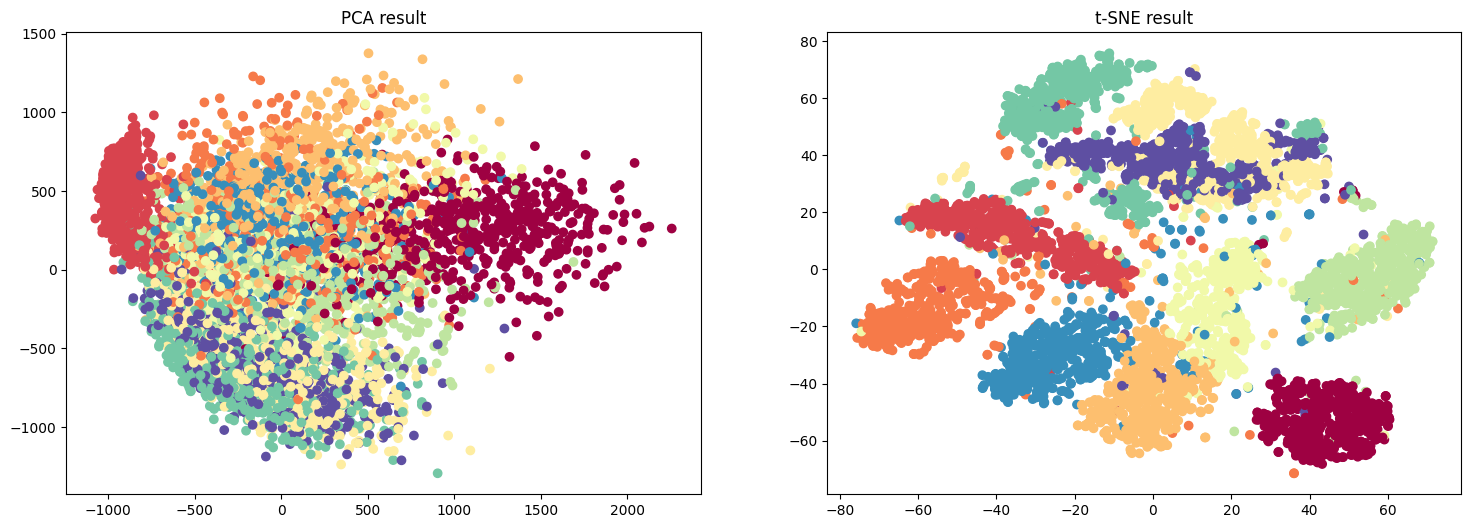

In [20]:
from sklearn.manifold import TSNE
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_mnist_train)
tsne = TSNE(n_components=2, random_state=2)
X_tsne = tsne.fit_transform(X_mnist_train)

# Visualization
fig = plt.figure(figsize=(18, 6))

# PCA
ax1 = fig.add_subplot(121)
ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_mnist_train, cmap=plt.cm.Spectral)
ax1.set_title("PCA result")

# t-SNE
ax2 = fig.add_subplot(122)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_mnist_train, cmap=plt.cm.Spectral)
ax2.set_title("t-SNE result")

## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first, and then calculate accuracy with KNN.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Time elapsed for UMAP: 10.4095 seconds


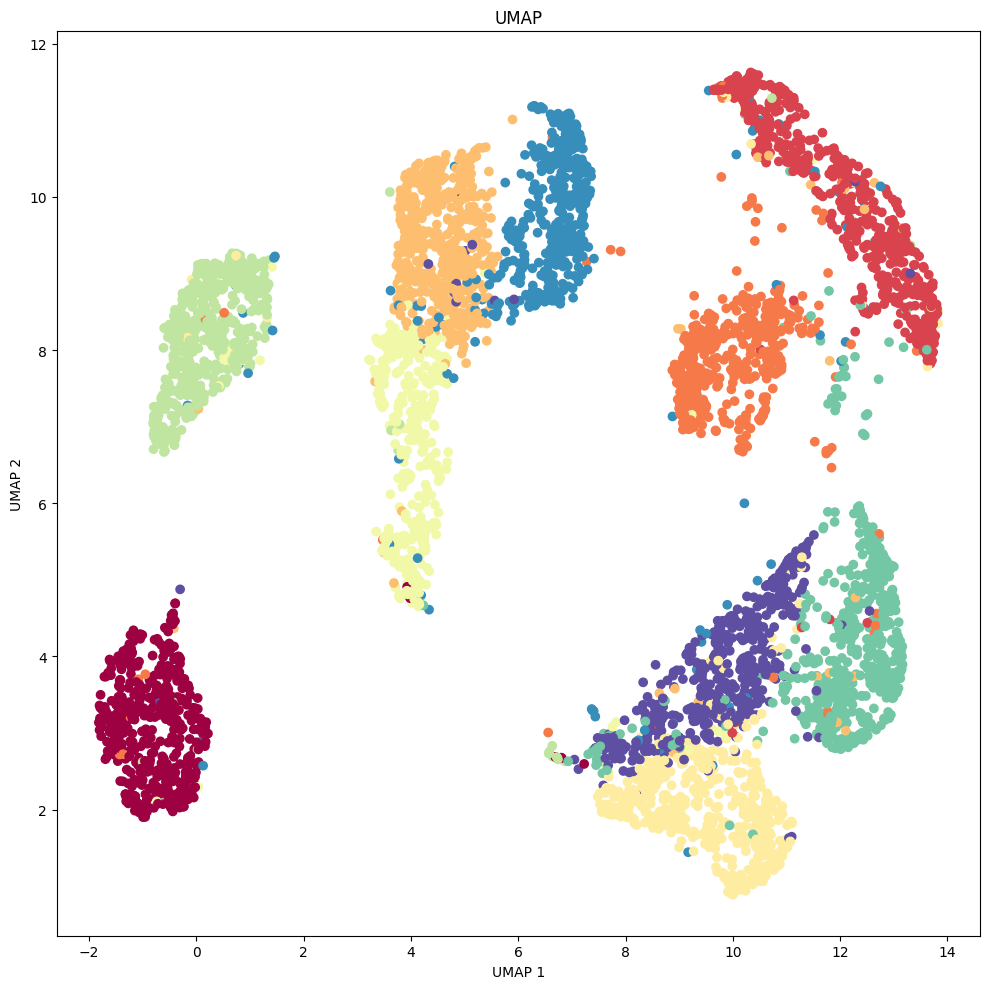

In [37]:
import umap
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import time

start_time_umap = time.time()
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_mnist_train)
end_time_umap = time.time()

elapsed_umap = end_time_umap - start_time_umap
print(f"Time elapsed for UMAP: {elapsed_umap:.4f} seconds")

# Plot the data
fig = plt.figure(figsize=(10, 10))

# UMAP plot
ax3 = fig.add_subplot(111)
ax3.scatter(X_umap[:, 0], X_umap[:, 1],c=y_mnist_train,cmap=plt.cm.Spectral)
ax3.set_title('UMAP')
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()



In [18]:
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

X_mnist_test_reduced=umap_model.transform(X_mnist_test)
knn.fit(X_umap, y_mnist_train)
y_pred_umap = knn.predict(X_mnist_test_reduced) # How do you do this?
print(f"UMAP-transformed Data Accuracy: {accuracy_score(y_mnist_test, y_pred_umap)}")

Original Data Accuracy: 0.9421428571428572
UMAP-transformed Data Accuracy: 0.9042857142857142


## Exercise 4

Try exploring the impact of dimensionality reduction using the following sample data.

1. How does a KNN classifier do as the number of dimensions increases?
2. Apply a PCA that captures 90% of the variance. Does it help?
3. Does UMAP help?
4. What explains the difference? 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Original Data Accuracy: 0.844
PCA Data Accuracy: 0.844
UMAP Data Accuracy: 0.765


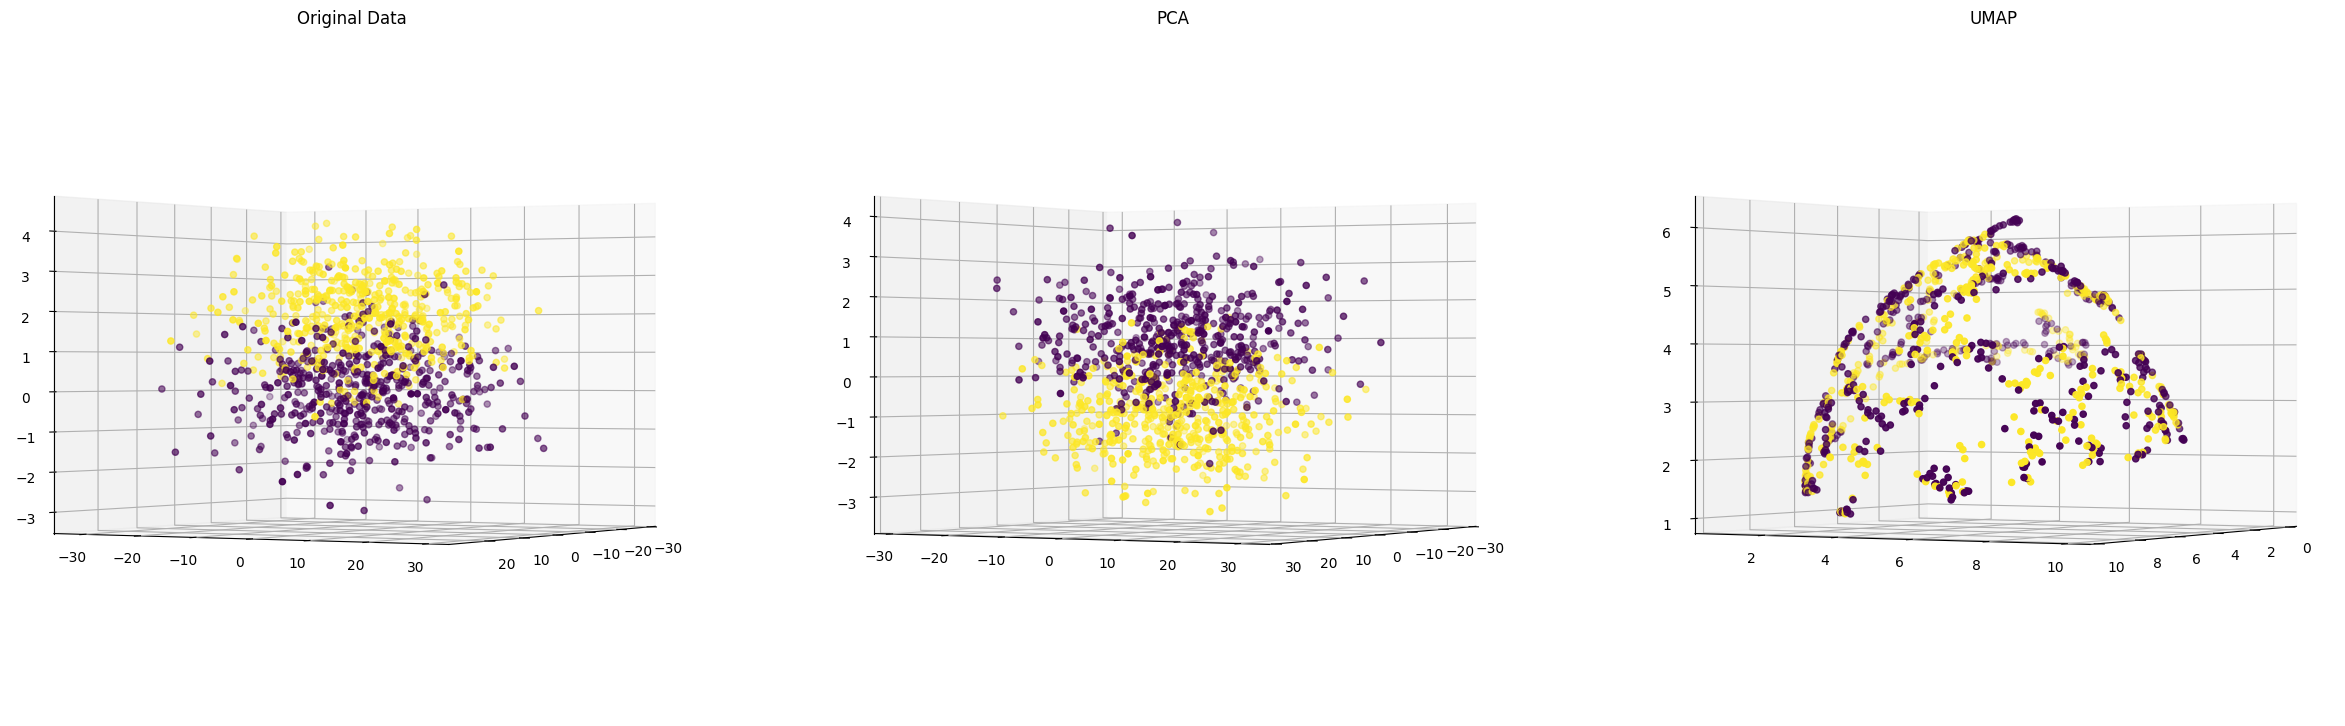

In [35]:
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))

pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
X_umap=umap_model.fit_transform(X)

# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

knn.fit(X_pca, y)
y_pred_pca = knn.predict(X_pca)
print(f"PCA Data Accuracy: {accuracy_score(y, y_pred_pca)}")

knn.fit(X_umap, y)
y_pred_umap = knn.predict(X_umap)
print(f"UMAP Data Accuracy: {accuracy_score(y, y_pred_umap)}")

# Create a new figure
fig = plt.figure(figsize=(30,10))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax1 = fig.add_subplot(131, projection='3d')
ax1.view_init(elev=0, azim=30)

ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax1.set_title('Original Data')

# The format is (rows, columns, plot_number)
ax2 = fig.add_subplot(132, projection='3d')
ax2.view_init(elev=0, azim=30)

ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax2.set_title('PCA')

# The format is (rows, columns, plot_number)
ax3 = fig.add_subplot(133, projection='3d')
ax3.view_init(elev=0, azim=30)

ax3.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=y, cmap='viridis')
ax3.set_title('UMAP')

plt.show()
